In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

from utils import load_mnist
from trainer import Trainer

In [8]:
from argparse import Namespace


config = {
    'train_ratio':.8,
    'batch_size':256,
    'n_epochs':50,
    'verbose':1,
    'btl_size':2,
    'layer':8,
}

config = Namespace(**config)

print(config)

Namespace(train_ratio=0.8, batch_size=256, n_epochs=50, verbose=1, btl_size=2, layer=8)


In [9]:
print(config.train_ratio)

0.8


In [10]:
def show_img(x):
    if x.dim() == 1:
        x = x.view(int(x.size(0) ** .5),-1)
    
    plt.imshow(x,cmap='gray')
    plt.show()
    
        

In [11]:
train_x, train_y = load_mnist(flatten=True)
test_x, test_y = load_mnist(is_train=False,flatten=True)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

torch.Size([60000, 784])
torch.Size([60000])
torch.Size([10000, 784])
torch.Size([10000])


In [12]:
train_cnt = int(train_x.size(0) * config.train_ratio)
valid_cnt = train_x.size(0) - train_cnt

indices = torch.randperm(train_x.size(0))
train_x, valid_x = torch.index_select(
    train_x,
    dim=0,
    index=indices
).split([train_cnt, valid_cnt], dim=0)
train_y, valid_y = torch.index_select(
    train_y,
    dim=0,
    index=indices
).split([train_cnt, valid_cnt], dim=0)

In [13]:
from model import Autoencoder

In [14]:
model = Autoencoder(btl_size=config.btl_size,layers=config.layer)
optimizer = optim.Adam(model.parameters())
crit = nn.MSELoss()

trainer = Trainer(model=model,optimizer=optimizer,crit=crit)



In [15]:
model

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=673, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(673, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=673, out_features=561, bias=True)
    (4): ReLU()
    (5): BatchNorm1d(561, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=561, out_features=449, bias=True)
    (7): ReLU()
    (8): BatchNorm1d(449, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=449, out_features=338, bias=True)
    (10): ReLU()
    (11): BatchNorm1d(338, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Linear(in_features=338, out_features=226, bias=True)
    (13): ReLU()
    (14): BatchNorm1d(226, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Linear(in_features=226, out_features=114, bias=True)
    (16): ReLU()
    (17): BatchNorm1d(114, eps=1e-05,

In [16]:
trainer.train((train_x,train_x),(valid_x,valid_x),config)

1-epoch의 model의 state_dict: OrderedDict([('encoder.0.weight', tensor([[-2.9112e-02, -1.0608e-02, -2.1389e-02,  ...,  2.1281e-02,
          1.3909e-02, -1.7926e-02],
        [ 1.3270e-02,  3.1374e-02,  3.3501e-02,  ...,  1.6724e-02,
          1.0986e-02, -5.2975e-03],
        [ 4.8458e-03, -2.0564e-02,  1.5910e-03,  ..., -2.7871e-02,
         -6.6179e-03,  9.9633e-04],
        ...,
        [-1.2686e-02,  2.0819e-02, -3.2636e-02,  ...,  1.5972e-02,
         -1.1298e-03,  2.2370e-02],
        [-2.5031e-02,  1.6812e-02, -1.2589e-02,  ...,  1.4343e-02,
          1.6087e-03, -3.5149e-02],
        [ 3.3113e-02, -4.2699e-03, -1.3297e-02,  ..., -1.7980e-02,
         -1.7903e-05, -1.3139e-02]])), ('encoder.0.bias', tensor([ 2.0458e-02, -1.2631e-02, -4.6010e-02,  1.0068e-02,  1.9828e-02,
         1.5319e-02, -3.4039e-02,  1.6794e-02, -4.3973e-03,  1.1415e-02,
        -3.0724e-02, -1.5076e-02, -3.4212e-02, -4.1057e-02,  2.5263e-02,
         2.1526e-02,  6.8797e-03, -3.7818e-02, -2.8393e-02, -4.839

### Test

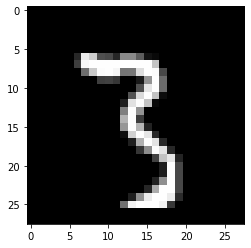

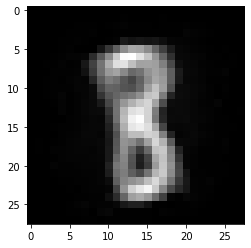

In [18]:
with torch.no_grad():
    import random

    index = int(random.random() * test_x.size(0))
    
    # |test_x| = (10000, 784)
    # |test_x[index]| = (784,)

    result = model(test_x[index].view(1, -1)).squeeze()

    show_img(test_x[index])
    show_img(result)

### Latent Space

tensor([1.3061, 1.0902])
tensor(7)


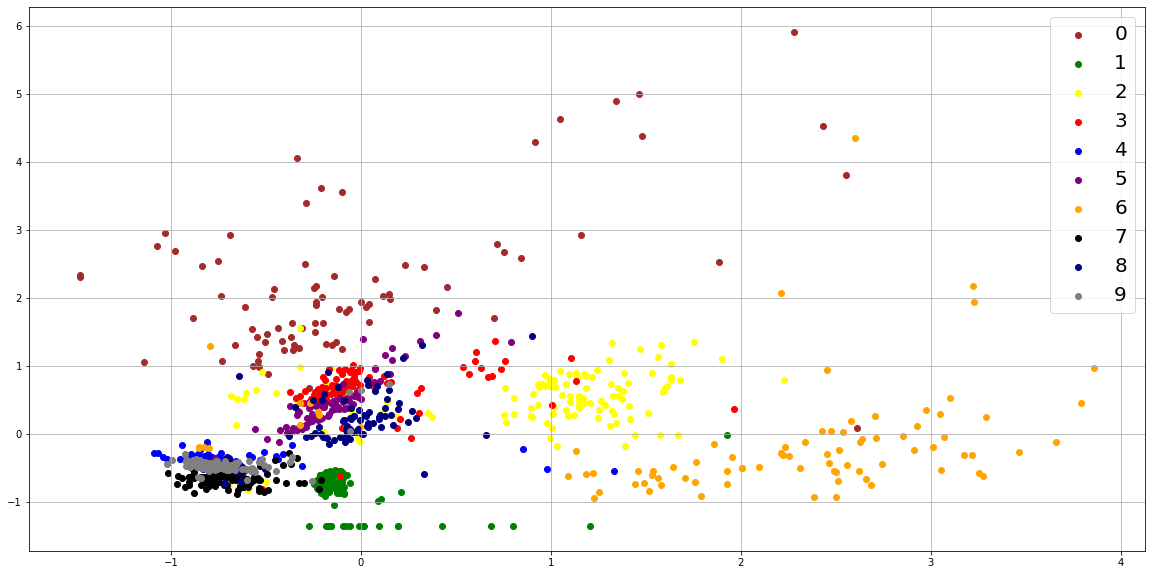

In [25]:
color_map = ['brown', 'green', 'yellow', 'red', 'blue', 'purple', 'orange', 'black', 'navy', 'gray']

plt.figure(figsize=(20,10))
with torch.no_grad():
    latents = model.encoder(test_x[:1000]) # |latents| = torch.Size([1000, 2])
    print(latents[1])
    print(test_y[0])
    for i in range(10):
        target_latents = latents[test_y[:1000] == i]
        
        plt.scatter(target_latents[:,0],
                    target_latents[:,1],
                    marker='o',
                    color=color_map[i],
                    label=i)
        
    plt.legend(fontsize=20)
    plt.grid(axis='both')
    plt.show()